In [1]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt
from shapely.ops import nearest_points
from shapely.geometry import LineString

In [2]:
#reading the tourist points
tourist = gpd.read_file("tourist.shp")
tourist.head()

,rand_point,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,0.0,158,NLD,Netherlands,14,Zuid-Holland,Provincie,Province,None,Hollande-méridionale|South Holland,POINT (4.30626 51.98096)
1,1.0,158,NLD,Netherlands,14,Zuid-Holland,Provincie,Province,None,Hollande-méridionale|South Holland,POINT (4.21664 52.05168)
2,2.0,158,NLD,Netherlands,14,Zuid-Holland,Provincie,Province,None,Hollande-méridionale|South Holland,POINT (4.66520 51.80954)
3,3.0,158,NLD,Netherlands,14,Zuid-Holland,Provincie,Province,None,Hollande-méridionale|South Holland,POINT (4.48573 51.88939)
4,4.0,158,NLD,Netherlands,14,Zuid-Holland,Provincie,Province,None,Hollande-méridionale|South Holland,POINT (4.01888 51.78173)


In [3]:
#reading the national monuments in Zuid_holland(south holland)
monuments = gpd.read_file("National_monument.shp")
monuments.head()

,ID,rijksmonum,complex_nu,aard_monum,herkomst,kwaliteit_,hoofdcateg,subcategor,rijksmonu0,juridische,geometry
0,45137818.0,2494.0,None,onroerend gebouwd,BAG,globaal,Woningen en woningbouwcomplexen,Woonhuis(K),https://monumentenregister.cultureelerfgoed.nl...,rijksmonument,POINT (93390.000 463722.000)
1,45142060.0,6876.0,None,onroerend gebouwd,BAG,globaal,"Boerderijen, molens en bedrijven",Boerderij (M),https://monumentenregister.cultureelerfgoed.nl...,rijksmonument,POINT (107763.000 464259.000)
2,45142061.0,6877.0,None,onroerend gebouwd,RCE dico,exact,Religieuze gebouwen,Kerk en kerkonderdeel,https://monumentenregister.cultureelerfgoed.nl...,rijksmonument,POINT (107946.268 464981.074)
3,45142258.0,7091.0,None,onroerend gebouwd,BAG,globaal,"Boerderijen, molens en bedrijven",Industrie- en poldermolen,https://monumentenregister.cultureelerfgoed.nl...,rijksmonument,POINT (103996.500 432468.900)
4,45142259.0,7092.0,None,onroerend gebouwd,BAG,globaal,Woningen en woningbouwcomplexen,Woonhuis(K),https://monumentenregister.cultureelerfgoed.nl...,rijksmonument,POINT (104810.000 430650.000)


In [4]:
monuments.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- [east]: Easting (m)
- [north]: Northing (m)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [5]:
tourist.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
tourist_proj= tourist.to_crs(epsg=28992)

In [7]:
tourist_proj.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [8]:
zuid_holland= gpd.read_file("zuid_holland1.shp")
zuid_holland.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
Zuid_h= zuid_holland.to_crs(epsg=28992)

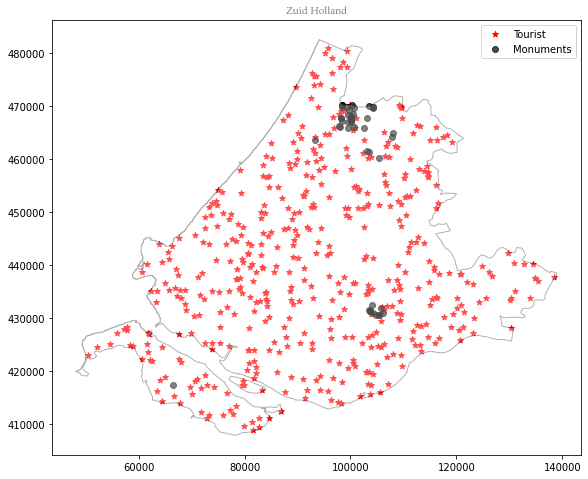

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
tourist_proj.plot(ax=ax, color="Red", marker= "*", label= "Tourist")
monuments.plot(ax=ax, color="black", alpha= 0.7, label= "Monuments")
Zuid_h.plot(ax=ax,color='white', edgecolor='black', alpha=0.3 ,label= "Zuid Holland")

plt.title('Zuid Holland', fontsize=10, fontname="Palatino Linotype", color="grey")
ax.legend()
plt.savefig("Tourist_monuments.png")

In [11]:
def calculate_nearest(row, destination, val, col="geometry"):
    dest_unary = destination["geometry"].unary_union
    nearest_geom = nearest_points(row[col], dest_unary)
    match_geom = destination.loc[destination.geometry == nearest_geom[1]]
    match_value = match_geom[val].to_numpy()[0]
    return match_value

In [12]:
tourist_proj["nearest_geom"] = tourist_proj.apply(calculate_nearest, destination=monuments, val="geometry", axis=1)

C:\Users\munya\AppData\Roaming\Python\Python39\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [13]:
tourist_proj["nearest_monument"] = tourist_proj.apply(calculate_nearest, destination=monuments, val="hoofdcateg", axis=1)

In [14]:
tourist_proj.head()

,rand_point,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,nearest_geom,nearest_monument
0,0.0,158,NLD,Netherlands,14,Zuid-Holland,Provincie,Province,None,Hollande-méridionale|South Holland,POINT (80739.594 444170.110),POINT (93390.000 463722.000),Woningen en woningbouwcomplexen
1,1.0,158,NLD,Netherlands,14,Zuid-Holland,Provincie,Province,None,Hollande-méridionale|South Holland,POINT (74710.506 452132.859),POINT (93390.000 463722.000),Woningen en woningbouwcomplexen
2,2.0,158,NLD,Netherlands,14,Zuid-Holland,Provincie,Province,None,Hollande-méridionale|South Holland,POINT (105208.880 424792.799),POINT (105378.000 430564.000),"Boerderijen, molens en bedrijven"
3,3.0,158,NLD,Netherlands,14,Zuid-Holland,Provincie,Province,None,Hollande-méridionale|South Holland,POINT (92942.737 433813.931),POINT (103557.000 431464.000),"Boerderijen, molens en bedrijven"
4,4.0,158,NLD,Netherlands,14,Zuid-Holland,Provincie,Province,None,Hollande-méridionale|South Holland,POINT (60581.127 422339.518),POINT (66436.000 417309.000),"Boerderijen, molens en bedrijven"


In [15]:
tourist_proj['line'] = tourist_proj.apply(lambda row: LineString([row['geometry'], row['nearest_geom']]), axis=1)
#tourist_proj.head()

C:\Users\munya\AppData\Roaming\Python\Python39\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [16]:
line = tourist_proj[["rand_point", "nearest_monument", "line"]].set_geometry('line')

In [17]:
line.crs = crs={"init":"epsg:28992"}

C:\Users\munya\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [18]:
tourist_proj.drop(["nearest_geom", "line"], axis=1, inplace=True)
tourist_proj.head()

,rand_point,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,nearest_monument
0,0.0,158,NLD,Netherlands,14,Zuid-Holland,Provincie,Province,None,Hollande-méridionale|South Holland,POINT (80739.594 444170.110),Woningen en woningbouwcomplexen
1,1.0,158,NLD,Netherlands,14,Zuid-Holland,Provincie,Province,None,Hollande-méridionale|South Holland,POINT (74710.506 452132.859),Woningen en woningbouwcomplexen
2,2.0,158,NLD,Netherlands,14,Zuid-Holland,Provincie,Province,None,Hollande-méridionale|South Holland,POINT (105208.880 424792.799),"Boerderijen, molens en bedrijven"
3,3.0,158,NLD,Netherlands,14,Zuid-Holland,Provincie,Province,None,Hollande-méridionale|South Holland,POINT (92942.737 433813.931),"Boerderijen, molens en bedrijven"
4,4.0,158,NLD,Netherlands,14,Zuid-Holland,Provincie,Province,None,Hollande-méridionale|South Holland,POINT (60581.127 422339.518),"Boerderijen, molens en bedrijven"


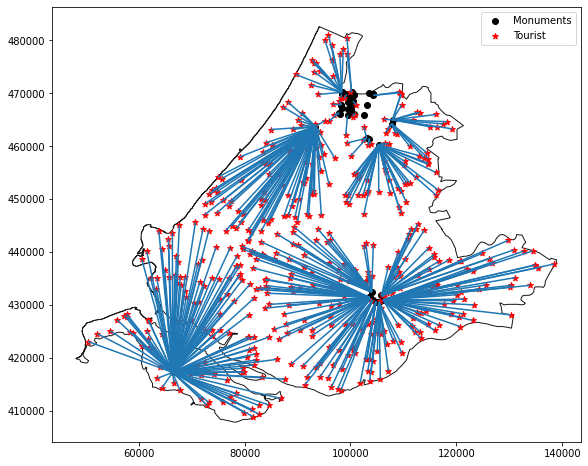

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
Zuid_h.plot(ax=ax,color='white', edgecolor='black', alpha=0.9 ,label= "Zuid Holland")
monuments.plot(ax=ax, color="black", alpha = 1 ,label= "Monuments")
line.plot(ax=ax)
tourist_proj.plot(ax=ax, color="Red", marker= "*", label= "Tourist")


ax.legend()
plt.savefig('Network_analysis.png')